In [41]:
# import the pandas library
import pandas as pd

# read the CSV file into a DataFrame object
df = pd.read_csv('Testdata.csv')
# print the DataFrame
for i in range (0, len(df.columns)):
    print(df.columns[i])
print(df)

EEG 1
EEG 2
EEG 3
EEG 4
EEG 5
EEG 6
EEG 7
EEG 8
Accelerometer X
Accelerometer Y
Accelerometer Z
Gyroscope X
Gyroscope Y
Gyroscope Z
Battery Level
Counter
Validation Indicator
          EEG 1       EEG 2       EEG 3       EEG 4       EEG 5       EEG 6  \
0      -371.691    4968.160    4173.625    5129.882   -7501.729   -4839.355   
1     -2536.981   34848.724   28886.978   36006.784  -52158.264  -31598.017   
2     -8451.566  115978.945  109509.285  116853.752 -165891.383 -102320.025   
3    -13914.334  250387.292  273032.350  228988.603 -324601.860 -205976.247   
4      7503.916  403629.375  510424.775  288987.321 -443528.377 -284594.050   
...         ...         ...         ...         ...         ...         ...   
8979    -90.365      25.398     -89.254      29.316      -5.852      65.097   
8980    -90.043      22.164     -88.849      25.555      -6.159      61.089   
8981    -89.448      20.056     -88.211      22.573      -6.149      56.263   
8982    -88.532      19.734     -87

In [42]:
# remove the columns that are not needed
df = df.drop(["Accelerometer X", "Accelerometer Y", "Accelerometer Z", "Gyroscope X", "Gyroscope Y", "Gyroscope Z", "Battery Level", "Counter", "Validation Indicator"], axis = 1)

In [43]:
# check if the columns are removed
print(df)

          EEG 1       EEG 2       EEG 3       EEG 4       EEG 5       EEG 6  \
0      -371.691    4968.160    4173.625    5129.882   -7501.729   -4839.355   
1     -2536.981   34848.724   28886.978   36006.784  -52158.264  -31598.017   
2     -8451.566  115978.945  109509.285  116853.752 -165891.383 -102320.025   
3    -13914.334  250387.292  273032.350  228988.603 -324601.860 -205976.247   
4      7503.916  403629.375  510424.775  288987.321 -443528.377 -284594.050   
...         ...         ...         ...         ...         ...         ...   
8979    -90.365      25.398     -89.254      29.316      -5.852      65.097   
8980    -90.043      22.164     -88.849      25.555      -6.159      61.089   
8981    -89.448      20.056     -88.211      22.573      -6.149      56.263   
8982    -88.532      19.734     -87.317      20.962      -5.792      53.568   
8983    -87.406      20.952     -86.280      20.679      -5.253      53.235   

          EEG 7      EEG 8  
0     -1243.908   6618

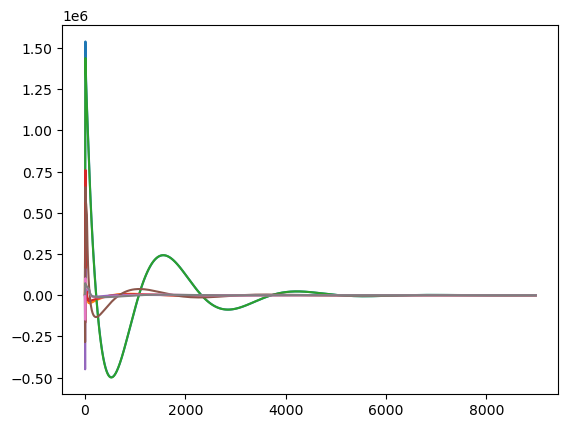

In [173]:
# plot the data from the dataframe
import matplotlib.pyplot as plt
import numpy as np
time = np.arange(0, df.shape[1], 1)
for i in range(df.shape[0]):
    plt.plot(time, df.iloc[i])

In [67]:
import numpy as np
# Define the epoch parameters
fs = 250 # sampling frequency in Hz
tmin = -0.5 # start time of epoch in seconds
tmax = 4.0 # end time of epoch in seconds
n_samples = int((tmax - tmin) * fs) # number of samples per epoch


In [74]:
import mne
# Create channel names
ch_names = ['EEG' + str(i) for i in range(1, 9)]
df = df.T
# Create info dictionary
info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types='eeg')
# Create Raw object from data
raw = mne.io.RawArray(df, info)

# Create events every 4.5 seconds
events = mne.make_fixed_length_events(raw, id=1, duration=4.5)

epochs = mne.Epochs(raw, events, tmin=-0.5, tmax=4.0, baseline=(None, 0), preload=True)



Creating RawArray with float64 data, n_channels=8, n_times=8984
    Range : 0 ... 8983 =      0.000 ...    35.932 secs
Ready.
Not setting metadata
7 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7 events and 1126 original time points ...
1 bad epochs dropped


In [189]:
# extract the maximum and minimum amplitude for each channel in each epoch
import numpy as np

# Get epochs data
data = epochs.get_data()

# Create empty lists to store the max and min amplitudes for each epoch
max_amp_list = []
min_amp_list = []

# Loop over epochs
for i in range(len(epochs)):
    # Get the data for the current epoch
    epoch_data = data[i]
    # Find the maximum amplitude for each channel in the current epoch
    max_amp = np.amax(epoch_data, axis=1)
    # Find the minimum amplitude for each channel in the current epoch
    min_amp = np.amin(epoch_data, axis=1)
    # Append the max and min amplitudes to the lists
    max_amp_list.append(max_amp)
    min_amp_list.append(min_amp)

# Convert the lists to numpy arrays
max_amp_array = np.array(max_amp_list)
min_amp_array = np.array(min_amp_list)

# Print the shape of the arrays
print(max_amp_array.shape) # (n_epochs, n_channels)
print(min_amp_array.shape) # (n_epochs, n_channels)


(6, 8)
(6, 8)


In [190]:
# classification (without normalization)
labels = [[],[]]
check_channel = [[1, 3], [5, 7]]
for i in range(len(epochs)):
    if max_amp_array[i, check_channel[0][0]] > max_amp_array[i, check_channel[0][1]] and min_amp_array[i, check_channel[0][0]] < min_amp_array[i, check_channel[0][1]]:
        labels[0].append(2)
    elif max_amp_array[i, check_channel[0][0]] > max_amp_array[i, check_channel[0][1]] or min_amp_array[i, check_channel[0][0]] < min_amp_array[i, check_channel[0][1]]:
        labels[0].append(1)
    else:
        labels[0].append(0)
        
    if max_amp_array[i, check_channel[1][0]] > max_amp_array[i, check_channel[1][1]] and min_amp_array[i, check_channel[1][0]] < min_amp_array[i, check_channel[1][1]]:
        labels[1].append(2)
    elif max_amp_array[i, check_channel[1][0]] > max_amp_array[i, check_channel[1][1]] or min_amp_array[i, check_channel[1][0]] < min_amp_array[i, check_channel[1][1]]:
        labels[1].append(1)
    else:
        labels[1].append(0)
        
print(labels)


[[2, 2, 1, 1, 2, 1], [1, 1, 2, 2, 2, 2]]


In [175]:
# Find the maximum and minimum amplitude for each channel in all epochs for normalization
all_max_amp = []
all_min_amp = []
for i in range(df.shape[0]):
    all_max_amp.append(np.amax(df.iloc[i]))
    all_min_amp.append(np.amin(df.iloc[i]))
print(all_max_amp, all_min_amp)

[1540139.729, 602368.679, 1439690.443, 759618.112, 160153.988, 656327.754, 102847.583, 73003.793] [-498063.24, -48562.599, -499418.058, -166717.492, -449857.15, -284594.05, -148775.727, -12008.91]


In [191]:
# Normalize the data
for i in range(len(epochs)):
    for j in range(df.shape[0]):
        max_amp_array[i][j] = max_amp_array[i][j]/all_max_amp[j]
        min_amp_array[i][j] = min_amp_array[i][j]/all_min_amp[j]
print(max_amp_array, min_amp_array)

[[1.67025439e-01 1.06930274e-03 1.77689702e-01 4.47132781e-04
  3.14354352e-04 5.09529519e-04 1.79301516e-02 4.97338735e-02]
 [1.62387312e-02 6.40942529e-03 1.73665880e-02 3.46667171e-03
  5.36261805e-03 2.31189238e-02 3.49841404e-03 4.37313731e-03]
 [4.66017785e-02 6.03129285e-05 4.97368521e-02 6.76215414e-05
  1.42532119e-04 2.26360402e-03 8.06089095e-03 1.19031463e-02]
 [9.05095640e-04 2.64427206e-04 9.75396299e-04 8.36554754e-05
  6.70629867e-05 4.79117413e-04 3.52910038e-04 2.22929491e-04]
 [4.81827539e-03 1.76439998e-04 5.16443883e-03 1.23142140e-04
  2.11407152e-04 1.31949521e-03 1.40525329e-03 1.37875148e-03]
 [2.33239114e-04 4.11326299e-05 2.45911853e-04 5.05565129e-05
  1.93641512e-05 1.49721314e-04 2.17553399e-05 8.14707614e-05]] [[1.31181798e-01 2.20183737e-01 1.30705303e-01 4.58135421e-02
  5.53496570e-03 1.74153295e-01 1.80975976e-02 8.14812165e-02]
 [2.75885126e-01 2.81613742e-03 2.74039279e-01 3.51884978e-04
  1.81776222e-05 1.77466356e-03 8.48818283e-03 1.46621000e-01]

In [192]:
# classification (with normalization)
labels = [[],[]]
check_channel = [[1, 3], [5, 7]]
for i in range(len(epochs)):
    if max_amp_array[i, check_channel[0][0]] > max_amp_array[i, check_channel[0][1]] and min_amp_array[i, check_channel[0][0]] < min_amp_array[i, check_channel[0][1]]:
        labels[0].append(2)
    elif max_amp_array[i, check_channel[0][0]] > max_amp_array[i, check_channel[0][1]] or min_amp_array[i, check_channel[0][0]] < min_amp_array[i, check_channel[0][1]]:
        labels[0].append(1)
    else:
        labels[0].append(0)
        
    if max_amp_array[i, check_channel[1][0]] > max_amp_array[i, check_channel[1][1]] and min_amp_array[i, check_channel[1][0]] < min_amp_array[i, check_channel[1][1]]:
        labels[1].append(2)
    elif max_amp_array[i, check_channel[1][0]] > max_amp_array[i, check_channel[1][1]] or min_amp_array[i, check_channel[1][0]] < min_amp_array[i, check_channel[1][1]]:
        labels[1].append(1)
    else:
        labels[1].append(0)
        
print(labels)

[[1, 1, 0, 1, 1, 0], [0, 2, 1, 2, 0, 2]]
